# The search for dark vessels - AIS / ship detection fusion workflow

- Get SPOT imagery for the given AOI
- Execute tiling, ship detection and ship identification blocks via parallel jobs
- Visualize the results

- The example costs around xxxx UP42 credits

## Setup

Import required libraries

In [2]:
import up42
import geopandas as gpd
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
from shapely.geometry import box

Configure areas of interest

In [2]:
aoi_akl = {"type":"FeatureCollection","features":[{"type":"Feature","properties":{},
                "geometry":{"type":"Polygon","coordinates":[[[174.758265,-36.840828],
                                                             [174.767042,-36.840828],
                                                             [174.767042,-36.835593],
                                                             [174.758265,-36.835593],
                                                             [174.758265,-36.840828]]]}}]}
aoi_cpt = {"type":"FeatureCollection","features":[{"type":"Feature","properties":{},
                "geometry":{"type":"Polygon","coordinates":[[[18.429276,-33.915919],
                                                             [18.436084,-33.915919],
                                                             [18.436084,-33.909399],
                                                             [18.429276,-33.909399],
                                                             [18.429276,-33.915919]]]}}]}

aois = [{'title': 'AKL', 'geometry': aoi_akl},
        {'title': 'CPT', 'geometry': aoi_cpt}]

Authenticate with UP42

In [5]:
#up42.authenticate(project_id="123", project_api_key="456")
up42.authenticate(cfg_file="config.json")
up42.settings(log=False)

2020-11-26 11:00:31,095 - Got credentials from config file.
2020-11-26 11:00:31,331 - Authentication with UP42 successful!
2020-11-26 11:00:31,332 - Logging disabled - use up42.settings(log=True) to reactivate.


# Catalog Search

Search cloudfree SPOT images for the two aois and visualise the quicklooks.

2020-11-26 11:23:26,094 - Searching catalog with search_parameters: {'datetime': '2019-01-01T00:00:00Z/2020-12-31T23:59:59Z', 'intersects': {'type': 'Polygon', 'coordinates': (((174.758265, -36.840828), (174.767042, -36.840828), (174.767042, -36.835593), (174.758265, -36.835593), (174.758265, -36.840828)),)}, 'limit': 3, 'query': {'dataBlock': {'in': ['oneatlas-spot-fullscene', 'oneatlas-spot-aoiclipped']}, 'cloudCoverage': {'lte': 5}}, 'sortby': [{'field': 'properties.acquisitionDate', 'direction': 'desc'}]}



---------AKL---------



2020-11-26 11:23:26,493 - 1 results returned.
2020-11-26 11:23:26,535 - Getting quicklooks from provider oneatlas for image_ids: ['5f259634-7988-4703-b685-28dc31150fb6']
2020-11-26 11:23:26,536 - Download directory: /Users/markus.mueller/projects/up42-py/examples/project_2db3c170-7772-4bef-9344-2182421e2938/catalog
100%|██████████| 1/1 [00:00<00:00,  1.56it/s]


geometry  \
0  POLYGON ((174.38418 -36.36942, 175.11048 -36.3...   

                                     id       acquisitionDate constellation  \
0  5f259634-7988-4703-b685-28dc31150fb6  2019-03-02T22:03:46Z          SPOT   

  providerName                                         blockNames  \
0     oneatlas  [oneatlas-spot-fullscene, oneatlas-spot-aoicli...   

   cloudCoverage     up42:usageType  \
0            0.0  [DATA, ANALYTICS]   

                                  providerProperties  \
0  {'commercialReference': 'SO19006759', 'acquisi...   

                                            scene_id  
0  DS_SPOT6_201903022203461_FR1_FR1_SV1_SV1_E175S...

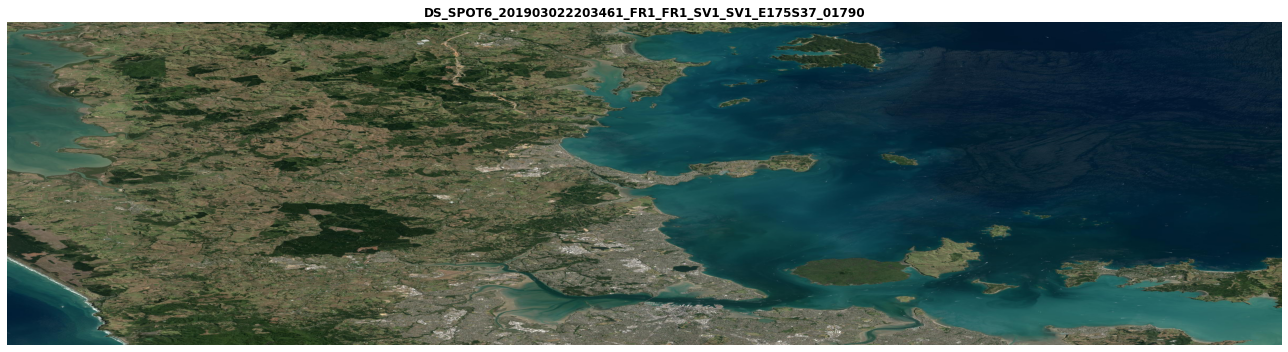

2020-11-26 11:23:28,122 - Searching catalog with search_parameters: {'datetime': '2019-01-01T00:00:00Z/2020-12-31T23:59:59Z', 'intersects': {'type': 'Polygon', 'coordinates': (((18.429276, -33.915919), (18.436084, -33.915919), (18.436084, -33.909399), (18.429276, -33.909399), (18.429276, -33.915919)),)}, 'limit': 3, 'query': {'dataBlock': {'in': ['oneatlas-spot-fullscene', 'oneatlas-spot-aoiclipped']}, 'cloudCoverage': {'lte': 5}}, 'sortby': [{'field': 'properties.acquisitionDate', 'direction': 'desc'}]}



---------CPT---------



2020-11-26 11:23:28,536 - 3 results returned.
2020-11-26 11:23:28,577 - Getting quicklooks from provider oneatlas for image_ids: ['ae9b18f1-eb1a-4b1f-8c21-04830e25a32d', '69435fc7-f0ca-40a8-97af-54c2f33203d4', 'd7932197-bf4c-434a-b91f-d275db743002']
2020-11-26 11:23:28,578 - Download directory: /Users/markus.mueller/projects/up42-py/examples/project_2db3c170-7772-4bef-9344-2182421e2938/catalog
100%|██████████| 3/3 [00:02<00:00,  1.37it/s]


geometry  \
0  POLYGON ((18.25142 -33.88798, 18.24633 -34.422...   
1  POLYGON ((17.92004 -33.47245, 17.91166 -34.489...   
2  POLYGON ((17.91927 -33.45469, 18.60631 -33.475...   

                                     id       acquisitionDate constellation  \
0  ae9b18f1-eb1a-4b1f-8c21-04830e25a32d  2020-03-03T09:46:46Z          SPOT   
1  69435fc7-f0ca-40a8-97af-54c2f33203d4  2020-02-19T08:32:17Z          SPOT   
2  d7932197-bf4c-434a-b91f-d275db743002  2019-04-21T08:17:42Z          SPOT   

  providerName                                         blockNames  \
0     oneatlas  [oneatlas-spot-fullscene, oneatlas-spot-aoicli...   
1     oneatlas  [oneatlas-spot-fullscene, oneatlas-spot-aoicli...   
2     oneatlas  [oneatlas-spot-fullscene, oneatlas-spot-aoicli...   

   cloudCoverage     up42:usageType  \
0           0.00  [DATA, ANALYTICS]   
1           1.32  [DATA, ANALYTICS]   
2           1.17  [DATA, ANALYTICS]   

                                  providerProperties  \
0  {'acquisitionDate': '2020-03-03T09:46:46Z', 'q...   
1  {'commercialReference': 'SO20065154', 'acquisi...   
2  {'commercialReference': 'SO19013271', 'acquisi...   

                                            scene_id  
0  DS_SPOT7_202003030832162_FR1_FR1_FR1_FR1_E019S...  
1  DS_SPOT6_202002190832176_FR1_FR1_FR1_FR1_E018S...  
2  DS_SPOT7_201904210817425_FR1_FR1_SV1_SV1_E018S...

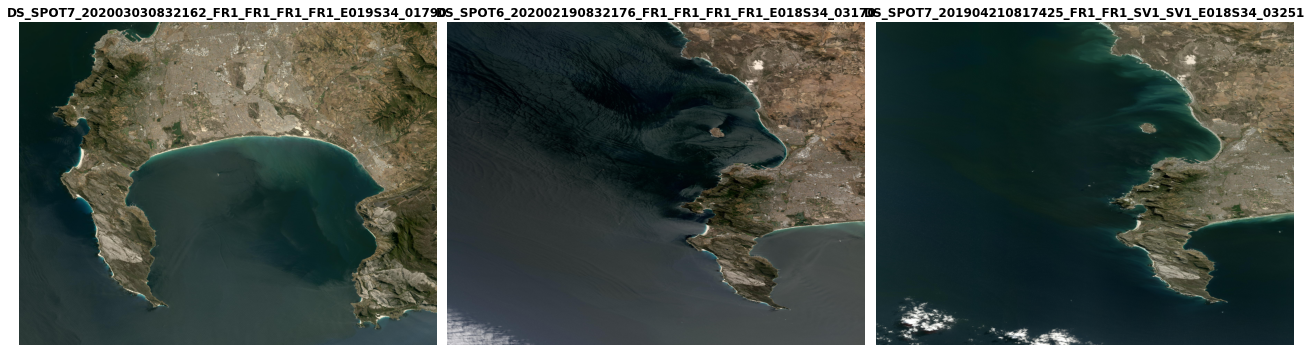

In [27]:
catalog = up42.initialize_catalog()


for aoi in aois:
    print("\n---------" + aoi["title"] + "---------\n")
    search_paramaters = catalog.construct_parameters(geometry=aoi['geometry'], 
                                                     start_date="2019-01-01",
                                                     end_date="2020-12-31",
                                                     sensors=["spot"],
                                                     max_cloudcover=5,
                                                     sortby="acquisitionDate",
                                                     ascending=False,
                                                     limit=3)
    search_results = catalog.search(search_paramaters)
    
    # Download & Visualise quicklooks
    catalog.download_quicklooks(image_ids=search_results.id.to_list(), sensor="spot")
    display(search_results.head())
    catalog.plot_quicklooks(figsize=(18,5), titles=search_results.scene_id.to_list())

    # Select least cloud scene for further workflow
    aoi["scene_id"] = search_results.scene_id.to_list()[0]

In [10]:
# Optional: Select ideal scenes manually
aois[0]["scene_id"] = "DS_PHR1B_202004281031350_FR1_PX_E013N52_0513_01239"
aois[1]["scene_id"] = "DS_PHR1B_202004161025425_FR1_PX_E011N48_1009_00822"

## Download selected SPOT images for aois

In [28]:
up42.settings(log=True)
project = up42.initialize_project()

# Increase the parallel job limit for the project.
#project.update_project_settings(max_concurrent_jobs=10)

2020-11-26 11:25:13,833 - Logging enabled (default) - use up42.settings(log=False) to disable.
2020-11-26 11:25:14,504 - Initialized Project(name: Dark vessels, project_id: 2db3c170-7772-4bef-9344-2182421e2938, description: Project used for the AIS webinar, createdAt: 2020-11-25T08:08:47.717742Z)


Create or update a workflow for the ship identification

In [29]:
workflow = project.create_workflow("Ship identification", use_existing=True)

2020-11-26 11:25:30,155 - Getting existing workflows in project ...
2020-11-26 11:25:30,798 - Got 1 workflows for project 2db3c170-7772-4bef-9344-2182421e2938.
100%|██████████| 1/1 [00:00<00:00,  2.86it/s]
2020-11-26 11:25:31,150 - Using existing workflow: Ship identification - e9cca692-e320-4b31-aac8-e2b024c474d1


Add or update workflows tasks

In [31]:
#up42.get_blocks(basic=True)
input_tasks= ['oneatlas-spot-aoiclipped', 'tiling', 'ship-detection', 'ship-identification']
workflow.add_workflow_tasks(input_tasks=input_tasks)
workflow

2020-11-26 11:26:01,178 - Added tasks to workflow: [{'name': 'oneatlas-spot-aoiclipped:1', 'parentName': None, 'blockId': '045019bb-06fc-4fa1-b703-318725b4d8af'}, {'name': 'tiling:1', 'parentName': 'oneatlas-spot-aoiclipped:1', 'blockId': '3e146dd6-2b67-4d6e-a422-bb3d973e32ff'}, {'name': 'ship-detection:1', 'parentName': 'tiling:1', 'blockId': '79e3e48c-d65f-4528-a6d4-e8d20fecc93c'}, {'name': 'ship-identification:1', 'parentName': 'ship-detection:1', 'blockId': '54217695-73f4-4528-a575-a429e9af6568'}]


Workflow(name: Ship identification, workflow_id: e9cca692-e320-4b31-aac8-e2b024c474d1, description: , createdAt: 2020-11-26T10:12:29.746194Z, project_id: 2db3c170-7772-4bef-9344-2182421e2938, workflow_tasks: {'oneatlas-spot-aoiclipped:1': '2.1.3', 'tiling:1': '2.2.3', 'ship-detection:1': '5.2.0-public', 'ship-identification:1': '2.3.0'}

### Run jobs in parallel

Construct workflow input parameters & run jobs

In [32]:
input_parameters_list = []

for aoi in aois:
    input_parameters = workflow.construct_parameters(geometry=aoi['geometry'], 
                                                     geometry_operation="bbox", 
                                                     scene_ids=[aoi["scene_id"]])
    #input_parameters['tiling:1']['tile_width']  = 1024
    #input_parameters['tiling:1']['tile_height'] = 1024
    input_parameters_list.append(input_parameters)

input_parameters_list

[{'oneatlas-spot-aoiclipped:1': {'limit': 1,
   'zoom_level': 17,
   'max_cloud_cover': 100,
   'panchromatic_band': False,
   'ids': ['DS_SPOT6_201903022203461_FR1_FR1_SV1_SV1_E175S37_01790'],
   'bbox': [174.758265, -36.840828, 174.767042, -36.835593]},
  'tiling:1': {'tile_width': 768,
   'tile_height': 768,
   'match_extents': False,
   'output_prefix': '',
   'augmentation_factor': 1,
   'discard_empty_tiles': True},
  'ship-detection:1': {},
  'ship-identification:1': {'minutes': 15}},
 {'oneatlas-spot-aoiclipped:1': {'limit': 1,
   'zoom_level': 17,
   'max_cloud_cover': 100,
   'panchromatic_band': False,
   'ids': ['DS_SPOT7_202003030832162_FR1_FR1_FR1_FR1_E019S34_01790'],
   'bbox': [18.429276, -33.915919, 18.436084, -33.909399]},
  'tiling:1': {'tile_width': 768,
   'tile_height': 768,
   'match_extents': False,
   'output_prefix': '',
   'augmentation_factor': 1,
   'discard_empty_tiles': True},
  'ship-detection:1': {},
  'ship-identification:1': {'minutes': 15}}]

In [33]:
jobs = workflow.run_jobs_parallel(input_parameters_list=input_parameters_list)

2020-11-26 11:35:40,564 - Selected input_parameters: {'oneatlas-spot-aoiclipped:1': {'limit': 1, 'zoom_level': 17, 'max_cloud_cover': 100, 'panchromatic_band': False, 'ids': ['DS_SPOT6_201903022203461_FR1_FR1_SV1_SV1_E175S37_01790'], 'bbox': [174.758265, -36.840828, 174.767042, -36.835593]}, 'tiling:1': {'tile_width': 768, 'tile_height': 768, 'match_extents': False, 'output_prefix': '', 'augmentation_factor': 1, 'discard_empty_tiles': True}, 'ship-detection:1': {}, 'ship-identification:1': {'minutes': 15}}.
2020-11-26 11:35:44,827 - Created and running new job: f9828c00-92d7-43d2-83e2-03c08765999d
2020-11-26 11:35:45,179 - Selected input_parameters: {'oneatlas-spot-aoiclipped:1': {'limit': 1, 'zoom_level': 17, 'max_cloud_cover': 100, 'panchromatic_band': False, 'ids': ['DS_SPOT7_202003030832162_FR1_FR1_FR1_FR1_E019S34_01790'], 'bbox': [18.429276, -33.915919, 18.436084, -33.909399]}, 'tiling:1': {'tile_width': 768, 'tile_height': 768, 'match_extents': False, 'output_prefix': '', 'augmen

### Download & Visualise results

In [43]:
jobtask = job.get_jobtasks()

2020-11-27 07:52:36,867 - Getting job tasks: 7e401e8f-c486-44e5-a2f5-8ca03adb44d6


In [64]:
data_results_paths, detection_results, identification_results = [], [], []
for job in jobs:
    data_task, _, detection_task, identification_task = job.get_jobtasks()
    data_paths = data_task.download_results()
    data_results_paths.append([p for p in data_paths if p.endswith(".tif")])
    detection_results.append(detection_task.get_results_json())
    identification_results.append(identification_task.get_results_json())

2020-11-27 08:31:00,221 - Getting job tasks: f9828c00-92d7-43d2-83e2-03c08765999d
2020-11-27 08:31:02,185 - Downloading results of jobtask 3a188443-45a9-43b4-b318-d5ab35c0a7ee
2020-11-27 08:31:02,186 - Download directory: /Users/markus.mueller/projects/up42-py/examples/project_2db3c170-7772-4bef-9344-2182421e2938/job_f9828c00-92d7-43d2-83e2-03c08765999d/jobtask_3a188443-45a9-43b4-b318-d5ab35c0a7ee
2897it [00:00, 235761.24it/s]
2020-11-27 08:31:03,399 - Download successful of 3 files to output_directory '/Users/markus.mueller/projects/up42-py/examples/project_2db3c170-7772-4bef-9344-2182421e2938/job_f9828c00-92d7-43d2-83e2-03c08765999d/jobtask_3a188443-45a9-43b4-b318-d5ab35c0a7ee': ['usage.json', 'data.json', 'c91429aa-1a0d-497f-a53c-9069e72c683c.tif']
2020-11-27 08:31:03,860 - Retrieved 17 features.
2020-11-27 08:31:04,291 - Retrieved 1 features.
2020-11-27 08:31:04,291 - Getting job tasks: 7e401e8f-c486-44e5-a2f5-8ca03adb44d6
2020-11-27 08:31:06,134 - Downloading results of jobtask f2

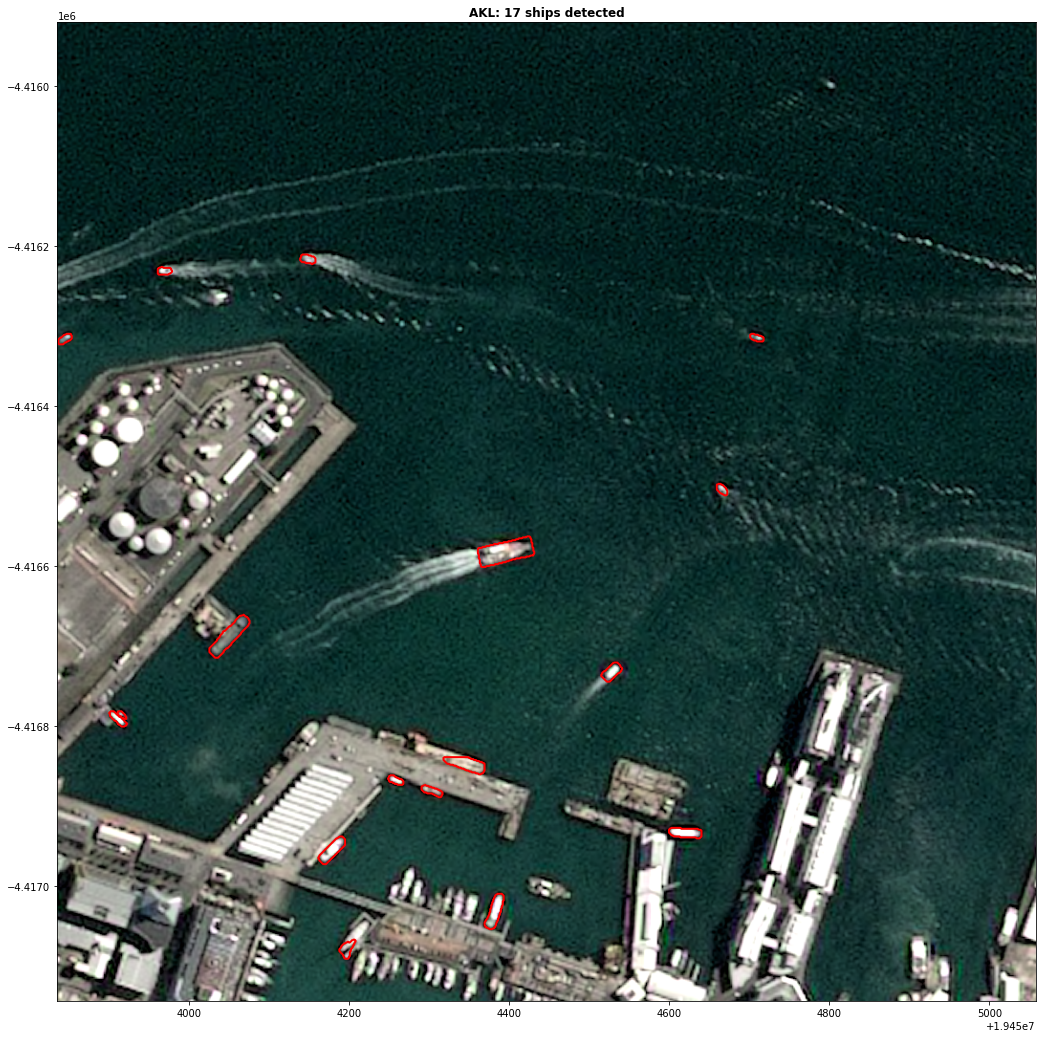

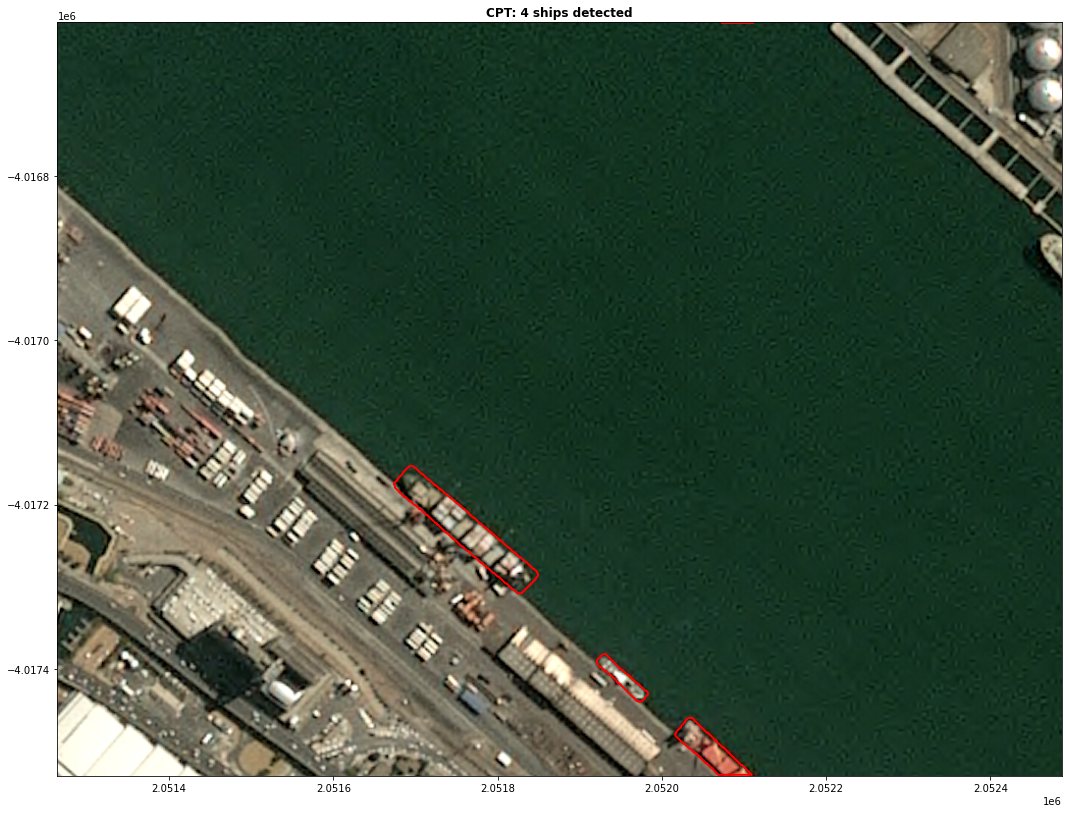

In [65]:
for i, (paths, detection) in enumerate(zip(data_results_paths, detection_results)):
    with rasterio.open(paths[0]) as src:
        fig, ax = plt.subplots(figsize=(18, 18))

        ships = gpd.GeoDataFrame.from_features(detection, crs={'init': "EPSG:4326"})
        ships = ships.to_crs(epsg=3857)
        #ships.geometry = ships.geometry.buffer(0.0001)
        #ships.geometry = ships.geometry.apply(lambda geo:box(*geo.bounds))

        show(src.read(), transform=src.transform, ax=ax, title=f"{aois[i]['title']}: {ships.shape[0]} ships detected")
    
        ships.plot(ax=ax, facecolor=(0,0,0,0), edgecolor='red', linewidth=2)
        
        plt.show()